<a href="https://colab.research.google.com/github/hadif1999/iot_smoke_detection_ML/blob/main/smoke_detection_iot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#smoke_detection_iot project

###importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras as tfk
import os

## preprocessing part

###reading data

### Downloading the dataset from GitHub

To download the dataset from GitHub, you'll need the raw URL of the CSV file. You can usually find this by navigating to the file on GitHub, clicking on the 'Raw' button, and then copying the URL from your browser's address bar.

Replace the placeholder URL below with the actual raw URL of your `smoke_detection_iot.csv` file.

In [2]:
import requests

# Replace with the actual raw GitHub URL of your CSV file
github_csv_url = "https://raw.githubusercontent.com/hadif1999/iot_smoke_detection_ML/main/smoke_detection_iot.csv"

response = requests.get(github_csv_url)
response.raise_for_status()  # Raise an HTTPError for bad responses (4xx or 5xx)

with open("smoke_detection_iot.csv", "wb") as f:
    f.write(response.content)

print("Dataset downloaded successfully to smoke_detection_iot.csv")

Dataset downloaded successfully to smoke_detection_iot.csv


In [3]:

data = pd.read_csv("smoke_detection_iot.csv")
data

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


Columns explanation :
<br>
Air Temperature
<br>
Air Humidity
<br>

TVOC: Total Volatile Organic Compounds; measured in parts per billion (Source)
<br>
eCO2: co2 equivalent concentration; calculated from different values like TVCO
<br>
Raw H2: raw molecular hydrogen; not compensated (Bias, temperature, etc.)
<br>
Raw Ethanol: raw ethanol gas (Source)¶
<br>
PM 1.0 and PM 2.5: particulate matter size < 1.0 µm (PM1.0). 1.0 µm < 2.5 µm (PM2.5)
<br>
Fire Alarm: ground truth is "1" if a fire is there
<br>
CNT: Sample counter
<br>
UTC: Timestamp UTC seconds
<br>
NC0.5/NC1.0 and NC2.5: Number concentration of particulate matter. This differs from PM because NC gives the actual number of particles in the air.
<br>
The raw NC is also classified by the particle size: < 0.5 µm (NC0.5); 0.5 µm < 1.0 µm (NC1.0); 1.0 µm < 2.5 µm (NC2.5)¶

## plotting the correlation of fire alarm with other columns

<Axes: >

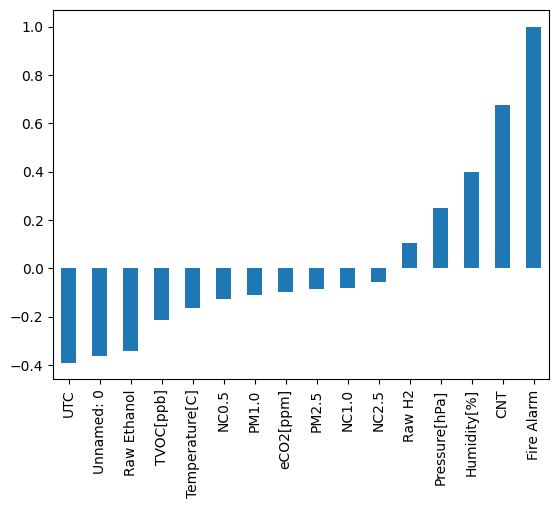

In [4]:
data.corr()["Fire Alarm"].sort_values().plot(kind='bar')

## deleting most uncorrelated data from DF

In [5]:
cols = ['Unnamed: 0',"PM2.5" , 'CNT' ,
             'UTC' , "Raw H2",
       'PM1.0' , 'NC0.5' ,'NC1.0' ,'NC2.5']

In [6]:
data2 = data.copy()
data2.drop(cols, axis=1, inplace=True)
data2

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw Ethanol,Pressure[hPa],Fire Alarm
0,20.000,57.36,0,400,18520,939.735,0
1,20.015,56.67,0,400,18651,939.744,0
2,20.029,55.96,0,400,18764,939.738,0
3,20.044,55.28,0,400,18849,939.736,0
4,20.059,54.69,0,400,18921,939.744,0
...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,20569,936.670,0
62626,18.653,15.87,612,400,20588,936.678,0
62627,18.867,15.84,627,400,20582,936.687,0
62628,19.083,16.04,638,400,20566,936.680,0


## outlier detection

for this purpose we must calculate upper and lower band of data.
<br>
first we should calculate Q1 , Q3 by quantile method which it sortes data itself.
<br>
second IQR = Q3-Q1
<br>
third upper bound = Q3+ 1.5 * IQR
<br>
lower band = Q1 - 1.5 * IQR

,0
Temperature[C],"Axes(0.125,0.798085;0.133621x0.0819149)"
Humidity[%],"Axes(0.285345,0.798085;0.133621x0.0819149)"
TVOC[ppb],"Axes(0.44569,0.798085;0.133621x0.0819149)"
eCO2[ppm],"Axes(0.606034,0.798085;0.133621x0.0819149)"
Raw Ethanol,"Axes(0.766379,0.798085;0.133621x0.0819149)"
Pressure[hPa],"Axes(0.125,0.699787;0.133621x0.0819149)"
Fire Alarm,"Axes(0.285345,0.699787;0.133621x0.0819149)"


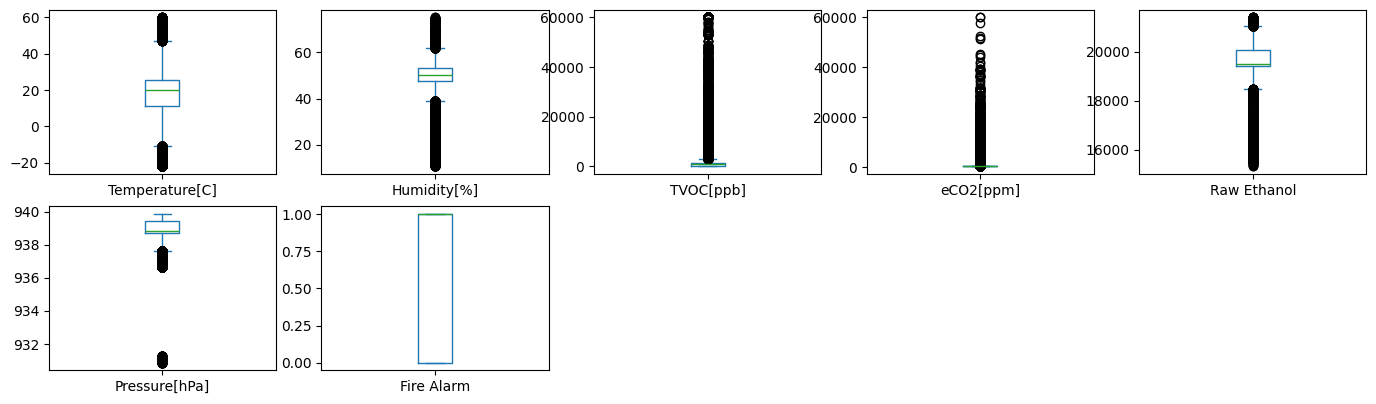

In [7]:
data2.plot(kind='box', subplots=True, layout=(8,5), figsize=(17,20))

In [11]:
def outlier_bands(df, multiplier: int = 1.5):

 Q1 = df.quantile(0.25)
 Q3 = df.quantile(0.75)

 IQR = Q3-Q1
 lower_band = Q1 - multiplier*IQR
 upper_band = Q3 + multiplier*IQR


 return lower_band,upper_band




In [13]:
low_band, up_band = outlier_bands(data2, multiplier=2)

data_clean = data2.copy()

# Create a boolean mask to identify rows with outliers
# A row is an outlier if any of its values are either greater than the upper band
# or less than the lower band for the respective column.
outlier_mask = ((data_clean > up_band) | (data_clean < low_band)).any(axis=1)

# Filter out the outlier rows
data_clean = data_clean[~outlier_mask]

print(f"Removed {len(data2) - len(data_clean)} outlier rows.")

Removed 15173 outlier rows.


In [15]:
data_clean.shape, data2.shape

((47457, 7), (62630, 7))

In [16]:
data_clean = data_clean.reset_index(drop = True)
#data_clean.drop(["level_0","index"],axis=1,inplace=True)
data_clean

In [17]:
data_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature[C],47457.0,15.672483,12.104503,-17.832,12.033,19.88,25.100,30.100
Humidity[%],47457.0,50.192783,4.014264,37.900,47.730,50.31,53.260,64.650
TVOC[ppb],47457.0,618.774659,550.390443,0.000,88.000,316.00,1180.000,1490.000
eCO2[ppm],47457.0,410.377563,21.131387,400.000,400.000,400.00,411.000,514.000
Raw Ethanol,47457.0,19857.978697,466.236737,18520.000,19435.000,19898.00,20122.000,21362.000
Pressure[hPa],47457.0,938.876311,0.748556,937.278,938.706,938.80,939.617,939.861
Fire Alarm,47457.0,0.704448,0.456295,0.000,0.000,1.00,1.000,1.000


In [18]:
y = data_clean["Fire Alarm"]

In [19]:
y.value_counts()

,count
Fire Alarm,
1,33431
0,14026


In [20]:
y = y.values
y

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
data_clean.isnull().sum()

,0
Temperature[C],0
Humidity[%],0
TVOC[ppb],0
eCO2[ppm],0
Raw Ethanol,0
Pressure[hPa],0
Fire Alarm,0


In [22]:
x = data_clean[["Temperature[C]","Humidity[%]","TVOC[ppb]","eCO2[ppm]","Raw Ethanol","Pressure[hPa]"]].values

# using HoldOut method as first evaluation method (evaluation will be done with K-Fold too later)

In [23]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.15, random_state=10)

In [25]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
x_ = (x- np.mean(x,axis=0)) / np.std(x,0)

### making nerual model generator

In [28]:

def model_gen ( n_HD_layer , n_neuron_list , input_shape = data_clean.shape[1:], ac_f = "sigmoid"):

  if not n_HD_layer == len(n_neuron_list) : print("number of hidden layers must be equal to len of list of number of neurons in each layer ")

  layer_list = []

  input_layer = tfk.layers.Input(input_shape,name = "input_layer")
  layer_list.append(input_layer)

  for i in range(n_HD_layer):

    hd_layer = tfk.layers.Dense(n_neuron_list[i], ac_f ,False,"glorot_normal",name = "hd_layer{}".format(i+1))(layer_list[-1])
    batch_layer = tfk.layers.BatchNormalization(name = "batch_layer{}".format(i+1))(hd_layer)
    drop_layer = tfk.layers.Dropout( 0.4 ,name = "drop_layer{}".format(i+1) )(batch_layer)

    layer_list.append(hd_layer)
    layer_list.append(batch_layer)
    layer_list.append(drop_layer)

  #drop_layer_final = tfk.layers.Dropout(0.4)(layer_list[-1])
  #layer_list.append(drop_layer_final)

  out_layer = tfk.layers.Dense(1,"sigmoid",False,name = "output_layer")(layer_list[-1])

  model = tfk.Model(inputs=input_layer , outputs =out_layer,name = "model01" )

  return model



In [52]:
model_args = dict(n_HD_layer=2 , n_neuron_list=[40, 20])

model1 = model_gen(**model_args, input_shape = X_train.shape[1:])
model1.summary()

Model: "model01"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hd_layer1 (Dense)               │ (None, 40)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_layer1                    │ (None, 40)             │           160 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_layer1 (Dropout)           │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hd_layer2 (Dense)               │ (None, 20)             │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_layer2                    │ (None, 20)             │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_layer2 (Dropout)           │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            20 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,300 (5.08 KB)

 Trainable params: 1,180 (4.61 KB)

 Non-trainable params: 120 (480.00 B)

In [38]:
model1.compile(optimizer = "Adam", loss="binary_crossentropy",
               metrics = ["accuracy","binary_accuracy",
                          tfk.metrics.AUC(),tfk.metrics.Precision()],)

In [39]:
hist1 = model1.fit(x = X_train, y = Y_train , batch_size = 24 , epochs = 3, validation_split=0.15)

Epoch 1/3
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8311 - auc_1: 0.9057 - binary_accuracy: 0.8311 - loss: 0.3738 - precision_1: 0.9139 - val_accuracy: 0.9706 - val_auc_1: 0.9975 - val_binary_accuracy: 0.9706 - val_loss: 0.0682 - val_precision_1: 0.9815
Epoch 2/3
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9433 - auc_1: 0.9860 - binary_accuracy: 0.9433 - loss: 0.1368 - precision_1: 0.9574 - val_accuracy: 0.9787 - val_auc_1: 0.9980 - val_binary_accuracy: 0.9787 - val_loss: 0.0610 - val_precision_1: 0.9727
Epoch 3/3
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9475 - auc_1: 0.9876 - binary_accuracy: 0.9475 - loss: 0.1284 - precision_1: 0.9594 - val_accuracy: 0.9795 - val_auc_1: 0.9982 - val_binary_accuracy: 0.9795 - val_loss: 0.0631 - val_precision_1: 0.9744


In [40]:
model1.save("smoke_detection_iot.h5")

### model evaluation



In [44]:
eval = model1.evaluate(X_test, Y_test)

223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9723 - auc_1: 0.9975 - binary_accuracy: 0.9723 - loss: 0.0711 - precision_1: 0.9638


In [45]:
print("final accuracy for test data is : " , eval[1])

final accuracy for test data is :  0.9735918045043945


###Classification Report

223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


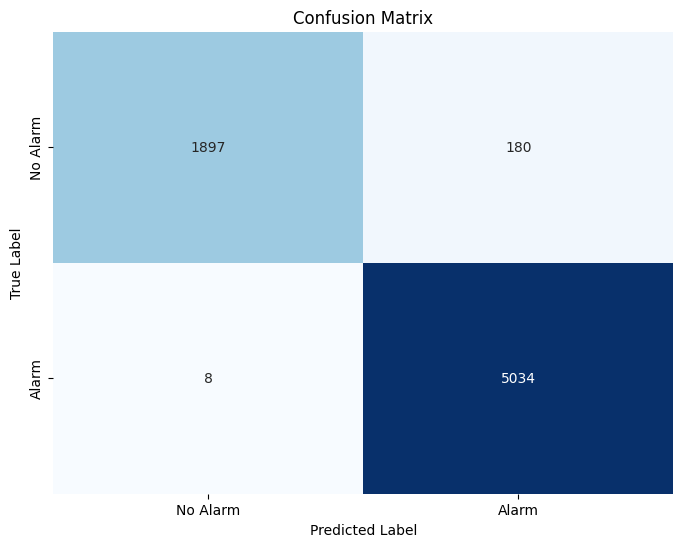

Confusion Matrix:
 [[1897  180]
 [   8 5034]]

Classification Report:
               precision    recall  f1-score   support

    No Alarm       1.00      0.91      0.95      2077
       Alarm       0.97      1.00      0.98      5042

    accuracy                           0.97      7119
   macro avg       0.98      0.96      0.97      7119
weighted avg       0.97      0.97      0.97      7119



In [46]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_hat = model1.predict(X_test)
y_hat_ = np.round(y_hat.T[0])

# Generate the confusion matrix
cm = confusion_matrix(Y_test, y_hat_)

# Define class labels for clarity
class_labels = ['No Alarm', 'Alarm']

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(Y_test, y_hat_, target_names=class_labels))

# Crossvalidation Task
Perform K-fold cross-validation on the preprocessed data (`x` and `y`) using the `model_gen` function. For each fold, scale the training and validation data, train a new model, and evaluate its performance. Finally, aggregate and present the average and standard deviation of the accuracy, AUC, precision, and loss across all folds.

## Prepare Data for K-fold

### Subtask:
Ensure the feature data (x) and target labels (y) are ready for K-fold cross-validation by converting them to NumPy arrays.


**Reasoning**:
The subtask requires converting the target labels `y` to a NumPy array and ensuring `x` is also a NumPy array. The existing code block `70euNKB_oOWE` performs the conversion of `y` to a NumPy array.



In [50]:
if not isinstance(y, np.ndarray):
    y = y.values

## Initialize KFold

### Subtask:
Initialize a KFold object from `sklearn.model_selection` to define the cross-validation splitting strategy.


**Reasoning**:
To initialize the KFold object, I need to first import the KFold class from sklearn.model_selection and then instantiate it with the specified parameters (`n_splits=5`, `shuffle=True`, `random_state=42`).



In [47]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
print("KFold object 'kf' initialized successfully.")

KFold object 'kf' initialized successfully.


## Implement K-fold Loop

### Subtask:
Iterate through each fold generated by KFold. In each iteration, perform the following: split the data into training and validation sets, apply StandardScaler independently, create and compile a new model, train the model, and evaluate its performance, storing the metrics.


**Reasoning**:
I need to implement the K-fold cross-validation loop as described in the instructions. This involves initializing lists for metrics, iterating through folds, splitting and scaling data, creating, compiling, and training a model for each fold, and finally evaluating and storing the metrics.



In [53]:
accuracy_scores = []
auc_scores = []
precision_scores = []
loss_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(x)):
    print(f"\n--- Fold {fold+1}/{kf.n_splits} ---")
    # 3. Split the data into training and validation sets
    X_train_fold, X_val_fold = x[train_index], x[val_index]
    Y_train_fold, Y_val_fold = y[train_index], y[val_index]

    # 4 & 5. Instantiate StandardScaler and apply it
    sc = StandardScaler()
    X_train_fold = sc.fit_transform(X_train_fold)
    X_val_fold = sc.transform(X_val_fold)

    # 6. Create a new model instance for the current fold
    model_fold = model_gen(**model_args, input_shape=X_train_fold.shape[1:])

    # 7. Compile the new model
    model_fold.compile(optimizer="Adam", loss="binary_crossentropy",
                       metrics=["accuracy", "binary_accuracy",
                                  tfk.metrics.AUC(), tfk.metrics.Precision()])

    # 8. Train the model
    history = model_fold.fit(x=X_train_fold, y=Y_train_fold, batch_size=24, epochs=3, verbose=1) # Set verbose to 0 to suppress output for each epoch

    # 9. Evaluate the trained model
    eval_metrics = model_fold.evaluate(X_val_fold, Y_val_fold, verbose=0)
    print(f"Fold {fold+1} Evaluation: Loss = {eval_metrics[0]:.4f}, Accuracy = {eval_metrics[1]:.4f}, AUC = {eval_metrics[3]:.4f}, Precision = {eval_metrics[4]:.4f}")

    # 10. Append the evaluated metrics to their respective lists
    loss_scores.append(eval_metrics[0])
    accuracy_scores.append(eval_metrics[1])
    auc_scores.append(eval_metrics[3]) # Assuming AUC is at index 3 based on compile metrics
    precision_scores.append(eval_metrics[4]) # Assuming Precision is at index 4 based on compile metrics

print("\nK-fold cross-validation complete. Metrics stored.")


--- Fold 1/5 ---
Epoch 1/3
1582/1582 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8324 - auc_3: 0.9030 - binary_accuracy: 0.8324 - loss: 0.3722 - precision_3: 0.9098
Epoch 2/3
1582/1582 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9448 - auc_3: 0.9850 - binary_accuracy: 0.9448 - loss: 0.1387 - precision_3: 0.9580
Epoch 3/3
1582/1582 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9499 - auc_3: 0.9884 - binary_accuracy: 0.9499 - loss: 0.1226 - precision_3: 0.9599
Fold 1 Evaluation: Loss = 0.0577, Accuracy = 0.9761, AUC = 0.9980, Precision = 0.9803

--- Fold 2/5 ---
Epoch 1/3
1582/1582 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8497 - auc_4: 0.9272 - binary_accuracy: 0.8497 - loss: 0.3273 - precision_4: 0.9244
Epoch 2/3
1582/1582 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9418 - auc_4: 0.9855 - binary_accuracy: 0.9418 - loss: 0.1377 - precision_4: 0.9561
Epoch 3/3
1582/1582 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9477 - auc_4: 0.9873 - binary_accuracy: 0.9477 - loss:

**Reasoning**:
Now that the K-fold cross-validation is complete and metrics for each fold are stored, the next step is to aggregate these results by calculating the mean and standard deviation for each metric (accuracy, AUC, precision, and loss).



In [54]:
print(f"\nAverage Accuracy: {np.mean(accuracy_scores):.4f} (+/- {np.std(accuracy_scores):.4f})")
print(f"Average AUC: {np.mean(auc_scores):.4f} (+/- {np.std(auc_scores):.4f})")
print(f"Average Precision: {np.mean(precision_scores):.4f} (+/- {np.std(precision_scores):.4f})")
print(f"Average Loss: {np.mean(loss_scores):.4f} (+/- {np.std(loss_scores):.4f})")


Average Accuracy: 0.9789 (+/- 0.0017)
Average AUC: 0.9985 (+/- 0.0003)
Average Precision: 0.9766 (+/- 0.0042)
Average Loss: 0.0548 (+/- 0.0017)


## K-fold Cross-Validation for SVM



In [64]:
svm_accuracy_scores = []
svm_precision_scores = []
svm_recall_scores = []
svm_f1_scores = []

all_y_true = []
all_y_pred_svm = []

for fold, (train_index, val_index) in enumerate(kf.split(x)):
    print(f"\n--- SVM Fold {fold+1}/{kf.n_splits} ---")

    # Split the data
    X_train_fold, X_val_fold = x[train_index], x[val_index]
    Y_train_fold, Y_val_fold = y[train_index], y[val_index]

    # Scale the data
    sc_svm = StandardScaler()
    X_train_fold_scaled = sc_svm.fit_transform(X_train_fold)
    X_val_fold_scaled = sc_svm.transform(X_val_fold)

    # Instantiate a new SVC classifier
    svm_model_fold = SVC(random_state=42, C=0.5)

    # Train the SVM model
    svm_model_fold.fit(X_train_fold_scaled, Y_train_fold)

    # Make predictions
    y_pred_svm_fold = svm_model_fold.predict(X_val_fold_scaled)

    # Calculate metrics for the current fold
    report = classification_report(Y_val_fold, y_pred_svm_fold, output_dict=True)

    # Extract metrics for the positive class (class 1)
    accuracy_fold = report['accuracy']
    precision_fold = report['1']['precision']
    recall_fold = report['1']['recall']
    f1_fold = report['1']['f1-score']

    print(f"Fold {fold+1} Accuracy: {accuracy_fold:.4f}")
    print(f"Fold {fold+1} Precision (Class 1): {precision_fold:.4f}")
    print(f"Fold {fold+1} Recall (Class 1): {recall_fold:.4f}")
    print(f"Fold {fold+1} F1-Score (Class 1): {f1_fold:.4f}")

    # Append metrics to lists
    svm_accuracy_scores.append(accuracy_fold)
    svm_precision_scores.append(precision_fold)
    svm_recall_scores.append(recall_fold)
    svm_f1_scores.append(f1_fold)

    # Accumulate true and predicted labels
    all_y_true.extend(Y_val_fold)
    all_y_pred_svm.extend(y_pred_svm_fold)

print("\nSVM K-fold cross-validation complete. Metrics and predictions stored.")


--- SVM Fold 1/5 ---
Fold 1 Accuracy: 0.9998
Fold 1 Precision (Class 1): 0.9998
Fold 1 Recall (Class 1): 0.9998
Fold 1 F1-Score (Class 1): 0.9998

--- SVM Fold 2/5 ---
Fold 2 Accuracy: 0.9999
Fold 2 Precision (Class 1): 0.9999
Fold 2 Recall (Class 1): 1.0000
Fold 2 F1-Score (Class 1): 0.9999

--- SVM Fold 3/5 ---
Fold 3 Accuracy: 0.9996
Fold 3 Precision (Class 1): 0.9997
Fold 3 Recall (Class 1): 0.9997
Fold 3 F1-Score (Class 1): 0.9997

--- SVM Fold 4/5 ---
Fold 4 Accuracy: 0.9997
Fold 4 Precision (Class 1): 0.9996
Fold 4 Recall (Class 1): 1.0000
Fold 4 F1-Score (Class 1): 0.9998

--- SVM Fold 5/5 ---
Fold 5 Accuracy: 0.9996
Fold 5 Precision (Class 1): 0.9999
Fold 5 Recall (Class 1): 0.9996
Fold 5 F1-Score (Class 1): 0.9997

SVM K-fold cross-validation complete. Metrics and predictions stored.


In [65]:
print(f"\nAverage SVM Accuracy: {np.mean(svm_accuracy_scores):.4f} (+/- {np.std(svm_accuracy_scores):.4f})")
print(f"Average SVM Precision (Class 1): {np.mean(svm_precision_scores):.4f} (+/- {np.std(svm_precision_scores):.4f})")
print(f"Average SVM Recall (Class 1): {np.mean(svm_recall_scores):.4f} (+/- {np.std(svm_recall_scores):.4f})")
print(f"Average SVM F1-Score (Class 1): {np.mean(svm_f1_scores):.4f} (+/- {np.std(svm_f1_scores):.4f})")


Average SVM Accuracy: 0.9997 (+/- 0.0001)
Average SVM Precision (Class 1): 0.9998 (+/- 0.0001)
Average SVM Recall (Class 1): 0.9998 (+/- 0.0002)
Average SVM F1-Score (Class 1): 0.9998 (+/- 0.0001)


# metrics and confusion matrix for SVM


Consolidated Classification Report for SVM (K-fold):
              precision    recall  f1-score   support

    No Alarm       1.00      1.00      1.00     14026
       Alarm       1.00      1.00      1.00     33431

    accuracy                           1.00     47457
   macro avg       1.00      1.00      1.00     47457
weighted avg       1.00      1.00      1.00     47457



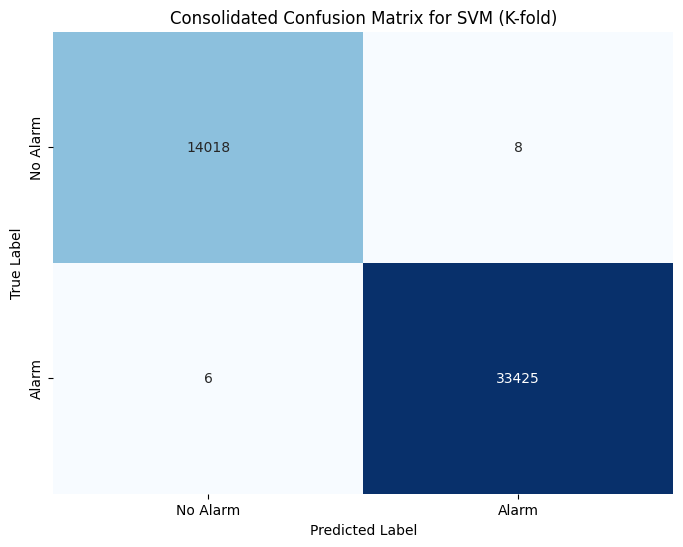

Consolidated Confusion Matrix (K-fold):
 [[14018     8]
 [    6 33425]]


In [66]:
print("\nConsolidated Classification Report for SVM (K-fold):")
print(classification_report(all_y_true, all_y_pred_svm, target_names=['No Alarm', 'Alarm']))

# Generate the consolidated confusion matrix
cm_svm_consolidated = confusion_matrix(all_y_true, all_y_pred_svm)

# Plotting the consolidated confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm_consolidated, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Alarm', 'Alarm'], yticklabels=['No Alarm', 'Alarm'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Consolidated Confusion Matrix for SVM (K-fold)')
plt.show()

print("Consolidated Confusion Matrix (K-fold):\n", cm_svm_consolidated)